In [1]:
import numpy as np
import DDM_util as util
import matplotlib.pyplot as plt
import networkx as nx
from IPython import display
%matplotlib inline

In [2]:
num_individuals = 4
axis_fontsize = 12
title_fontsize = 20
legendtitle_fontsize = 16
legendlabel_fontsize = 14
center = 2
T = 10

In [3]:
def test_oneleader_network(L, graph_name):
    x0 = np.zeros([num_individuals, 1])
    leader_indices = [center]
    leader_betas = [2]
    beta = util.create_leaderfollower_beta(num_individuals, leader_indices, leader_betas)
    sigma = np.zeros([num_individuals, 1])
    dt = 0.001
    plt.figure(0)
    x = util.run_simulation(x0, beta, L, dt, sigma, T, title=r"{0} graph, leader at index 1, $\beta_1=1$".format(graph_name))
    plt.figure(1)
    util.plot_discrepancy(x, [1], L, T)
    return x

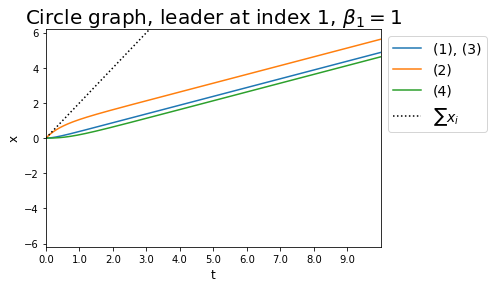

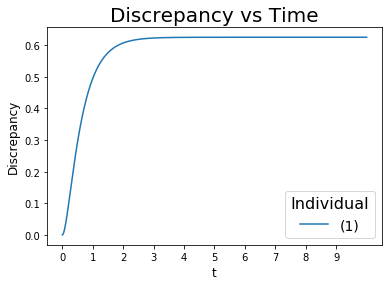

Total final discrepancy: 0.62
Final discrepancy: [ 0.625]


In [4]:
L_circle = util.create_circle_graph(num_individuals)
x_circle = test_oneleader_network(L_circle, "Circle")

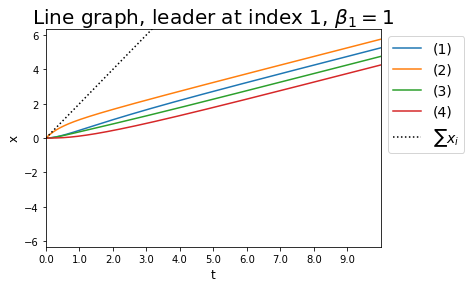

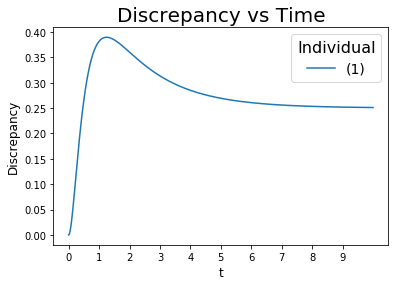

Total final discrepancy: 0.25
Final discrepancy: [ 0.2510101]


In [5]:
L_line = util.create_line_graph(num_individuals)
x_line = test_oneleader_network(L_line, "Line")

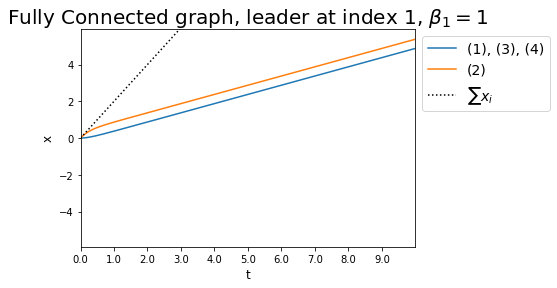

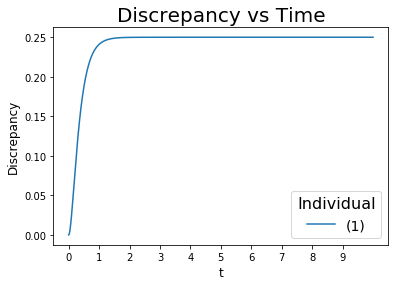

Total final discrepancy: 0.25
Final discrepancy: [ 0.25]


In [6]:
L_fc = util.create_fullyconnected_graph(num_individuals)
x_fc = test_oneleader_network(L_fc, "Fully Connected")

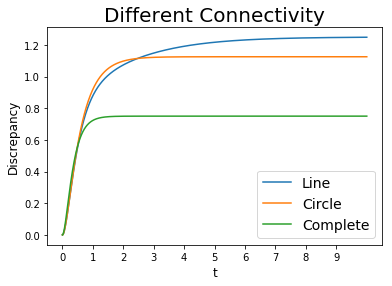

In [7]:
dt = 0.001

def plot_x(x, label, L):
    plt.plot([util.compute_discrepancy(x[:,t], center-1, L) for t in range(x.shape[1])], label=label)
plot_x(x_line, "Line", L_line)
plot_x(x_circle, "Circle", L_circle)
plot_x(x_fc, "Complete", L_fc)
legend = plt.legend(fontsize=legendlabel_fontsize)
plt.setp(legend.get_title(),fontsize=legendtitle_fontsize)
plt.xlabel("t", fontsize=axis_fontsize)
plt.ylabel("Discrepancy", fontsize=axis_fontsize)
plt.title(r"Different Connectivity", fontsize=title_fontsize)
t_vals = np.arange(0, T, 1)
plt.xticks(range(0, x_line.shape[1], int(x_line.shape[1]/T)), t_vals)
plt.savefig("../Figures/oneleader_graphstructure_connected", bbox_inches="tight")
plt.show()

In [8]:
def test_twoleader_network(L, graph_name, leader_indices):
    x0 = np.zeros([num_individuals, 1])
    leader_betas = [1, 1]
    beta = util.create_leaderfollower_beta(num_individuals, leader_indices, leader_betas)
    sigma = np.zeros([num_individuals, 1])
    dt = 0.001
    T = 10
    plt.figure(0)
    x = util.run_simulation(x0, beta, L, dt, sigma, T, title=r"{0} graph, leaders at indices {1} and {2}, $\beta_{1}=\beta_{2}=1$".format(graph_name, leader_indices[0], leader_indices[1]))
    plt.figure(1)
    util.plot_discrepancy(x, leader_indices, L, T)
    return x

In [9]:
num_individuals = 10

In [10]:
L = util.create_circle_graph(num_individuals)

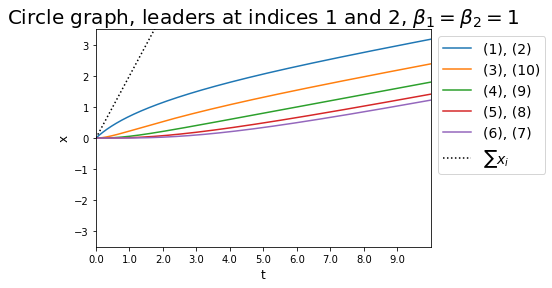

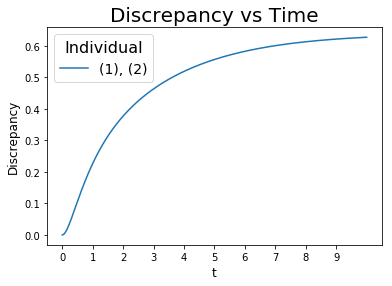

Total final discrepancy: 1.25
Final discrepancy: [ 0.62736894  0.62736894]


In [11]:
x_12 = test_twoleader_network(L, "Circle", [1,2])

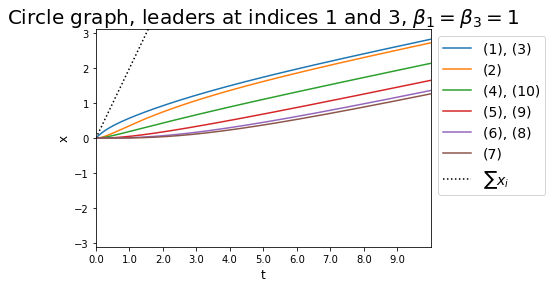

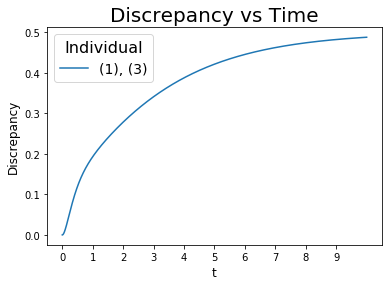

Total final discrepancy: 0.98
Final discrepancy: [ 0.48780417  0.48780417]


In [12]:
x_13 = test_twoleader_network(L, "Circle", [1,3])

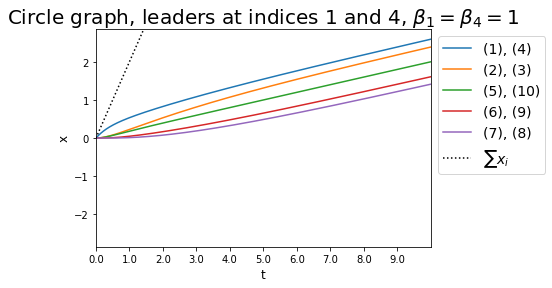

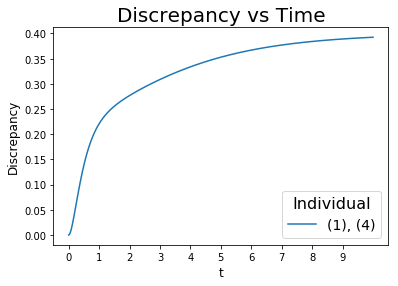

Total final discrepancy: 0.79
Final discrepancy: [ 0.39252809  0.39252809]


In [13]:
x_14 = test_twoleader_network(L, "Circle", [1,4])

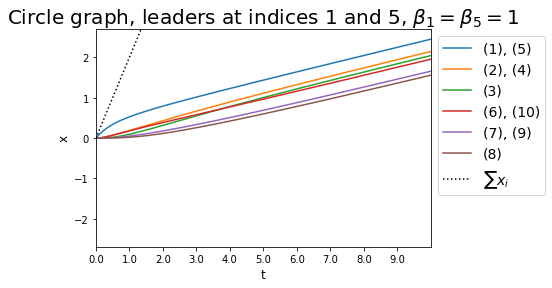

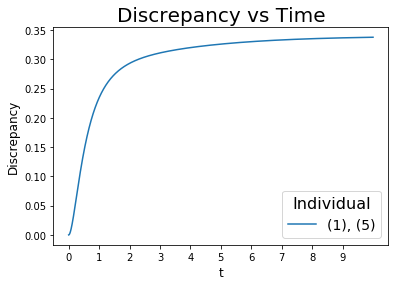

Total final discrepancy: 0.68
Final discrepancy: [ 0.33777492  0.33777492]


In [14]:
x_15 = test_twoleader_network(L, "Circle", [1,5])

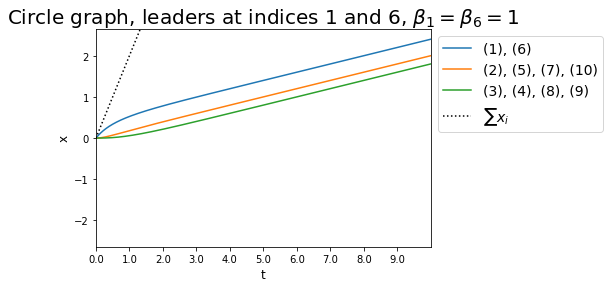

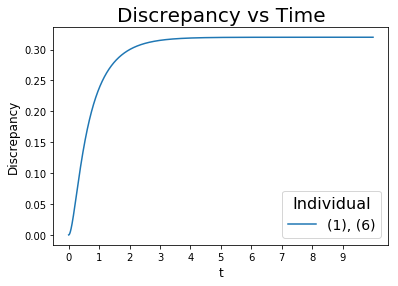

Total final discrepancy: 0.64
Final discrepancy: [ 0.31999968  0.31999968]


In [15]:
x_16 = test_twoleader_network(L, "Circle", [1,6])

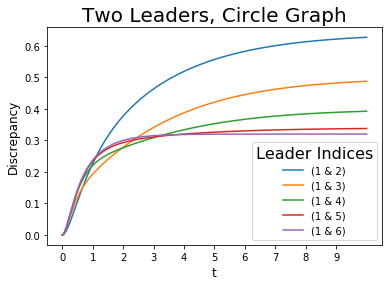

In [19]:
center = 1
T = 10
dt = 0.001
num_timesteps = int(T/dt)
xtick_spacing = int(num_timesteps / 10)

def plot_x(x, label, L):
    plt.plot([util.compute_discrepancy(x[:,t], center-1, L) for t in range(x.shape[1])], label=label)
plot_x(x_12, "(1 & 2)", L)
plot_x(x_13, "(1 & 3)", L)
plot_x(x_14, "(1 & 4)", L)
plot_x(x_15, "(1 & 5)", L)
plot_x(x_16, "(1 & 6)", L)
legend = plt.legend(title=r"Leader Indices", fontsize=legendlabel_fontsize-4)
plt.setp(legend.get_title(),fontsize=legendtitle_fontsize)
plt.xlabel("t", fontsize=axis_fontsize)
plt.ylabel("Discrepancy", fontsize=axis_fontsize)
plt.title(r"Two Leaders, Circle Graph", fontsize=title_fontsize)
t_vals = np.arange(0, T, 1)
plt.xticks(range(0, x_12.shape[1], int(x_12.shape[1]/T)), t_vals)
plt.savefig("../Figures/twoleader_circlegraph_coverage_connected", bbox_inches="tight")
plt.show()

In [17]:
util.compute_discrepancy(x_12[:,10], center-1, L)

9.8219934294919739e-05